In [1]:
%cd /home1/giorgian/projects/trigger-detection-pipeline/sPHENIX/tracking-GNN

/home1/giorgian/projects/trigger-detection-pipeline/sPHENIX/tracking-GNN


In [26]:
from train import load_config
from datasets import get_data_loaders
import matplotlib.pyplot as plt
import numpy as np
from datasets.hitgraphs_sparse_new import build_edges, calc_dphi
from tqdm.notebook import tqdm
import torch

In [3]:
config = load_config('configs/tracking.yaml')
config['data']['n_mix'] = 1
config['data']['batch_size'] = 256

In [4]:
train_data_loader, valid_data_loader = get_data_loaders(distributed=False, rank=1, n_ranks=1, **config['data'])

In [29]:
sums = [0]*5
counts = [0]*5
for batch in tqdm(train_data_loader):
    x = batch.x
    r = x[:, 0] * 3
    layer_id = x[:, -1]
    layer_id[layer_id == 4] = 3
    layer_id[layer_id == 5] = 4
    layer_id[layer_id == 6] = 4
    for i in range(5):
        sums[i] += torch.sum(r[layer_id == i]).numpy().item()
        counts[i] += torch.sum(layer_id == i).numpy().item()

  0%|          | 0/3907 [00:00<?, ?it/s]

In [31]:
np.array(sums)/np.array(counts)

array([2.53654013, 3.33592798, 4.1445396 , 7.46767887, 9.97344009])

In [7]:
layer_id.shape

torch.Size([16884])

In [ ]:
sums = np.zeros(5)

In [71]:
data_batch = next(vd)

In [72]:
data_batch

DataBatch(x=[82, 5], edge_index=[2, 132], y=[132], w=[132], i=[1], trigger=[1], pid=[82], batch=[82], ptr=[2])

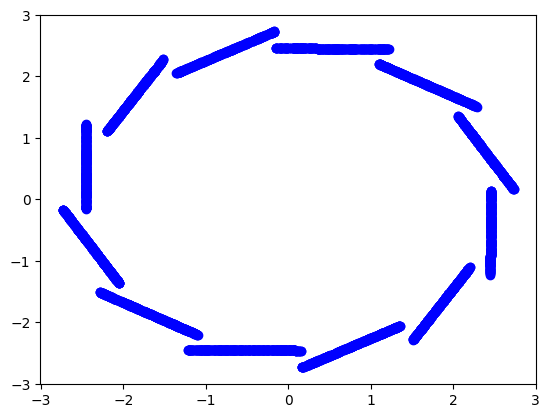

In [21]:
x = batch.x
#batch = batch.batch

# Filter out hits and edges that don't belong to the first batch
#x = x[batch == 0]
layer_id = x[:, -1]

# Assuming the first three columns of 'x' are the r, phi, and z coordinates
r = x[:, 0] * 3  # scaling back r
phi = x[:, 1]
z = x[:, 2] * 3  # scaling back z

# Convert from cylindrical to Cartesian coordinates
x_coord = r * np.cos(phi)
y_coord = r * np.sin(phi)
mask = (layer_id == 3) | (layer_id == 4)
# Plot the hit points
mask = (layer_id == 0)
plt.scatter(x_coord[mask], y_coord[mask], color='blue')

